Loading Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
from tqdm.notebook import tqdm

#torch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

# torchvision
import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms

# To ensure calculations are deterministic
torch.backends.cudnn.deterministic = True

# Setting device
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0")
print("Using device", device)

#importing support files
from mnist_loader import MnistDataloader

Using device cuda:0


Loading and processing the dataset

In [10]:
#Defining paths
training_images_filepath = r"data\train-images-idx3-ubyte\train-images-idx3-ubyte"
training_labels_filepath = r"data\train-labels-idx1-ubyte\train-labels-idx1-ubyte"
test_images_filepath = r"data\t10k-images-idx3-ubyte\t10k-images-idx3-ubyte"
test_labels_filepath = r"data\t10k-labels-idx1-ubyte\t10k-labels-idx1-ubyte"

# Importing dataset
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)

(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

In [34]:
train_dataset = []
test_dataset = []

for data, label in zip(x_train,y_train):
    train_dataset.append((np.array(data),label))
    
for data, label in zip(x_test,y_test):
    test_dataset.append((np.array(data),label))

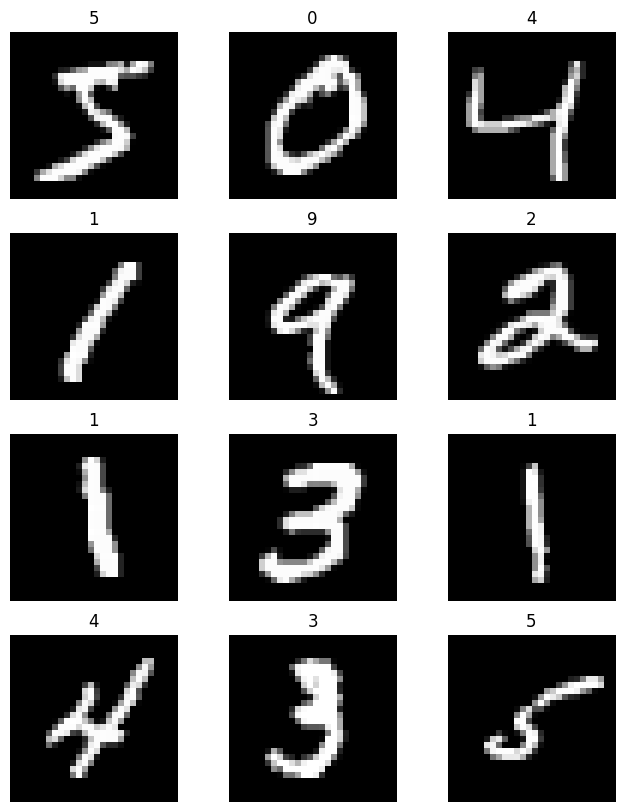

In [43]:
#Visualizing the dataset

row = 3
column = 4

plt.figure(figsize=(8, 10))

for i in range(12):
    plt.subplot(column, row, i+1)
    plt.imshow(train_dataset[i][0], cmap='gray')
    plt.title(str(train_dataset[i][1]))
    plt.axis('off')